In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import math

In [2]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

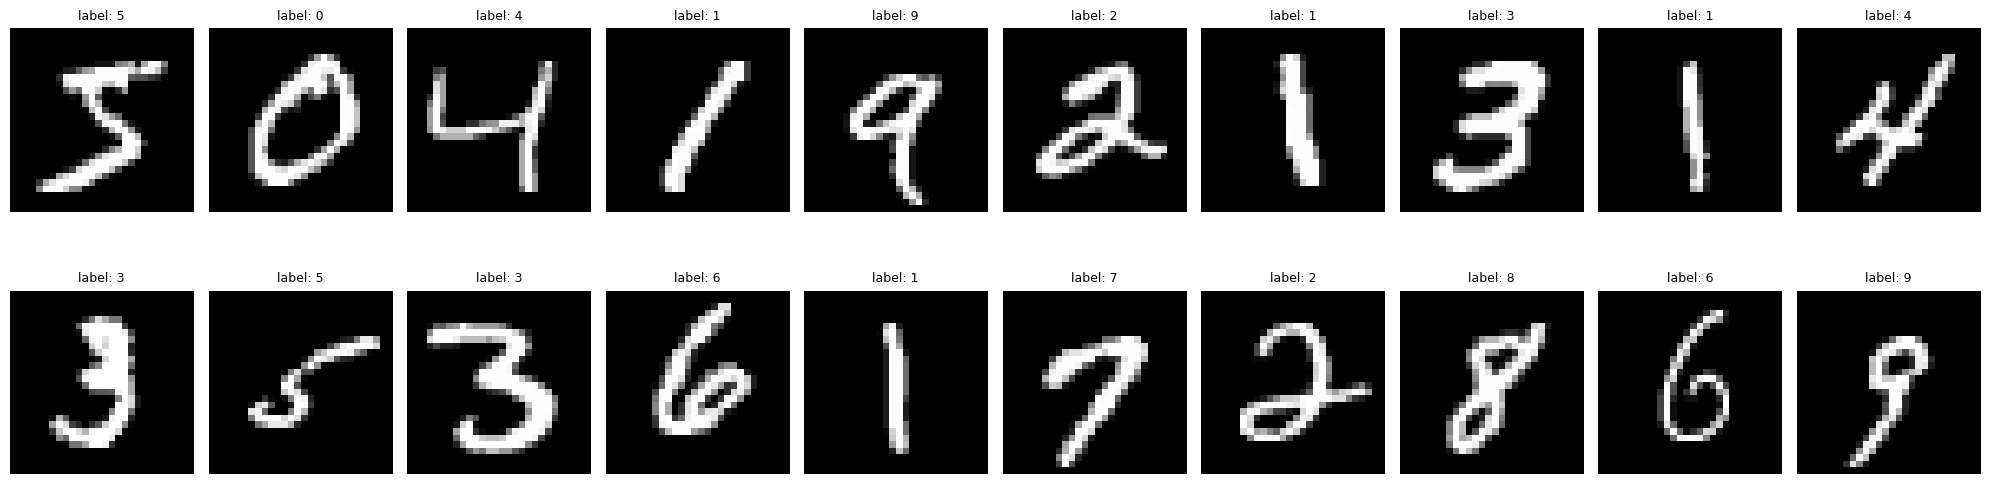

In [3]:
rows = 2
cols = 10
axes = []
fig = plt.figure(figsize=(20, 6))
for a in range(rows * cols):
    axes.append(fig.add_subplot(rows, cols, a + 1))
    subplot_title = ("label: " + str(y_train[a]))
    axes[-1].set_title(subplot_title, fontsize=9)
    axes[-1].imshow(x_train[a], cmap='gray')
    axes[-1].axis("off") 
plt.tight_layout()
plt.show()

In [4]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train stats -> min/mean/max:", float(x_train.min()), float(x_train.mean()), float(x_train.max()))

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train stats -> min/mean/max: 0.0 0.13066062331199646 1.0
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
batch_size = 32*211
epochs = 100

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8280 - loss: 0.5384 - val_accuracy: 0.9168 - val_loss: 0.2959
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8618 - loss: 0.4441 - val_accuracy: 0.9282 - val_loss: 0.2478
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8856 - loss: 0.3729 - val_accuracy: 0.9402 - val_loss: 0.2133
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9024 - loss: 0.3215 - val_accuracy: 0.9497 - val_loss: 0.1879
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9157 - loss: 0.2796 - val_accuracy: 0.9558 - val_loss: 0.1668
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9258 - loss: 0.2498 - val_accuracy: 0.9608 - val_loss: 0.1486
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9357 - loss: 0.2203 - val_accuracy: 0.9652 - val_loss: 0.1318
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9407 - loss: 0.1981 - val_accuracy: 0.9690 - val_loss: 0.1182


In [8]:
model.save("mnist_model.keras")